In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters

In [65]:
N = 10              # training samples
poly_order = 12      # polynomial order
M = 100             # testing samples
variance_y = 1e-6   # y guassian variance
variance_w = 8e-3       # w guassian variance

In [66]:
# Generate equispaced floats in the interval [0, 2*pi]
x_train = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x_train)
# Add noise
y += np.random.normal(mean, std, N)
#defining it as a matrix
y_train = np.asmatrix(y.reshape(N,1))

# adding the bias and higher order terms to x

In [72]:
x = x_train.reshape((N,1))
for i in range(0,poly_order-1):
	x = np.append(x,(x_train.reshape((N,1)))**(i+2),axis = 1)
x = np.asmatrix(x)
print(x.shape)
# print(x)

(10, 12)


# finding the optimum weights

In [68]:
w = (x.T*x +  (variance_y/variance_w)*np.eye(poly_order)).I*x.T*y_train
print(w)

[[ 6.72485729e-01]
 [ 4.01922430e-01]
 [-1.53537450e-01]
 [-1.29081553e-01]
 [-2.35503068e-02]
 [ 6.93587612e-02]
 [-2.46160170e-02]
 [ 2.19864568e-03]
 [ 4.84498749e-04]
 [-1.25305610e-04]
 [ 9.62986321e-06]
 [-2.17271822e-07]]


# generating test samples

In [69]:
x_test = np.linspace(0, 2*np.pi, M)
x = x_test.reshape(M,1)
for i in range(0,poly_order-1):
	x = np.append(x,(x_test.reshape((M,1)))**(i+2),axis = 1)
x = np.asmatrix(x)

# predicting the outputs for the test sample

In [70]:
y_test = x*w
y_test_normal = y_test + np.random.normal(0,np.sqrt(variance_y),(M,1))

# ploting the results

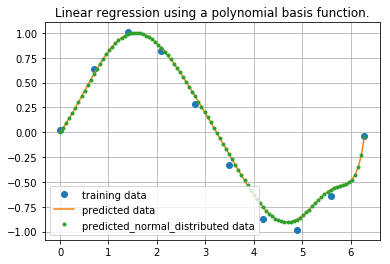

In [71]:
plt.plot(x_train,y_train,'o',label = 'training data')
plt.plot(x_test,y_test,label = 'predicted data')
plt.plot(x_test,y_test_normal,'.',label = 'predicted_normal_distributed data')
plt.legend()
plt.grid()
plt.title("Linear regression using a polynomial basis function.")
plt.show()

# Observations

- labels follow a Gaussian distribution
- weights themselves follow a Gaussian distribution
- Weights are estimated same as l2 regression with legrangian as (variance_y/variance_w)
- Both the variances are idependent and can be varied accaordingly